# Laboratorio di Simulazione Numerica: lezione 2

Elia Steve, 47122A

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import scipy

### Esercizio 2.1

In questo esercizio dobbiamo calcolare l'integrale

$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

in due modi: campionando una distribuzione uniforme e usando il metodo dell'importance sampling. Per quest'ultimo modo abbiamo deciso di campionare dalla distribuzione di probabilità su $[0, 1]$

$$p(x) = \frac{3}{2}(1-x^2),$$

che è simile all'integranda, come si vede nel grafico seguente.

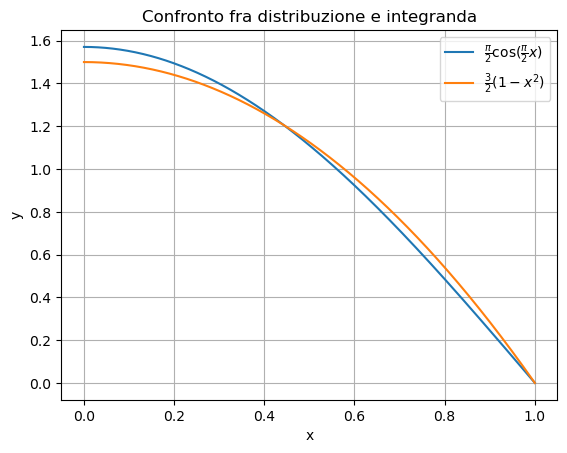

In [93]:
xs = np.linspace(0, 1, 1000)
plt.plot(xs, np.pi/2*np.cos(np.pi/2*xs), label=r"$\frac{\pi}{2}\cos(\frac{\pi}{2}x)$")
plt.plot(xs, 3./2*(1-xs**2), label=r"$\frac{3}{2}(1-x^2)$")
plt.title("Confronto fra distribuzione e integranda")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()

Disegnamo il grafico dei valori nel caso del campionamento dalla distribuzione uniforme:

In [94]:
valUnif = np.loadtxt("lsn2.1_uniform.dat", usecols=0)
errUnif = np.loadtxt("lsn2.1_uniform.dat", usecols=1)

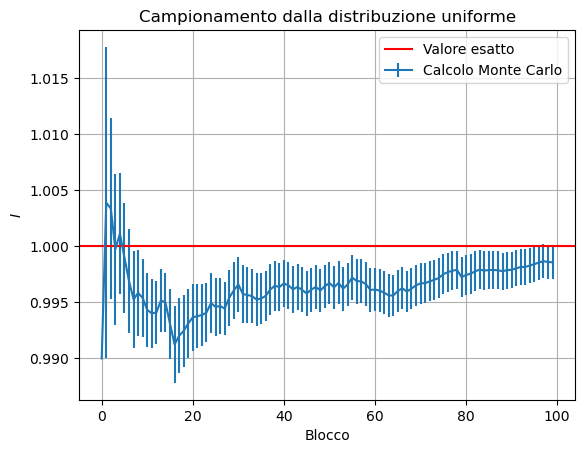

In [95]:
xs = np.arange(len(valUnif))
plt.errorbar(xs, valUnif, yerr=errUnif, label="Calcolo Monte Carlo")
plt.axhline(y=1, color="red", label="Valore esatto")
plt.title("Campionamento dalla distribuzione uniforme")
plt.xlabel("Blocco")
plt.ylabel("$I$")
plt.legend()
plt.grid(True)

Disegnamo il grafico dei valori anche nel caso dell'importance sampling:

In [96]:
valMine = np.loadtxt("lsn2.1_mine.dat", usecols=0)
errMine = np.loadtxt("lsn2.1_mine.dat", usecols=1)

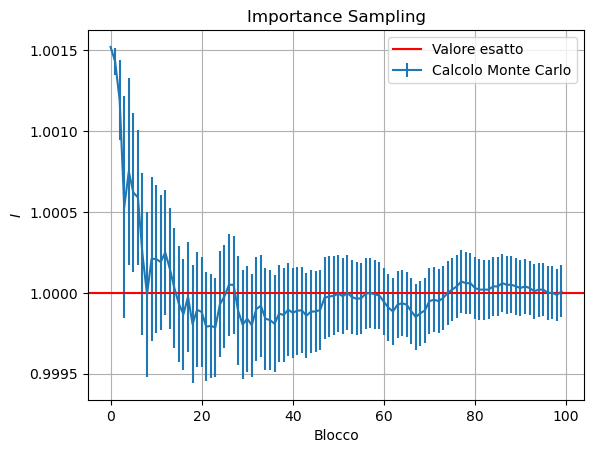

In [97]:
plt.errorbar(xs, valMine, yerr=errMine, label="Calcolo Monte Carlo")
plt.axhline(y=1, color="red", label="Valore esatto")
plt.title("Importance Sampling")
plt.xlabel("Blocco")
plt.ylabel("$I$")
plt.grid(True)
plt.legend()

Vediamo che in entrambi i casi c'è convergenza al valore esatto, ma l'importance sampling riduce gli errori, come ci aspettiamo (otteniamo una riduzione di un ordine di grandezza).

### Esercizio 2.2

In questo esercizio dobbiamo simulare un cammino aleatorio su un reticolo cubico e nel continuo, e verificare che la media della distanza percorsa scala come la radice del numero di passi.

Per generare un passo lungo un reticolo cubico estraiamo due numeri da una distribuzione uniforme: uno determina la direzione del passo, l'altro se il passo sia nel verso positivo o negativo (nel modo solito di scegliere fra $k$ alternative con probabilità uniforme: dividere un intervallo in $k$ parti uguali e a ogni parte far corrispondere un'alternativa, poi estrarre un punto nell'intervallo con probabilità uniforme e scegliere l'alternativa a seconda della parte in cui cade il punto). Per generare un passo nel continuo, che equivale a campionare punti sulla superficie di una sfera con probabilità uniforme, usiamo un metodo accept-reject: generiamo un punto in $[-1, 1]^3$ con probabilità uniforme e lo rigettiamo se non sta all'interno della sfera unitaria. Quando abiamo accettato un punto lo riscaliamo in modo che abbia la lunghezza adeguata.

In [98]:
discreteMeans, discreteErrors = np.loadtxt("discreteRW.dat", unpack=True)

<ErrorbarContainer object of 3 artists>

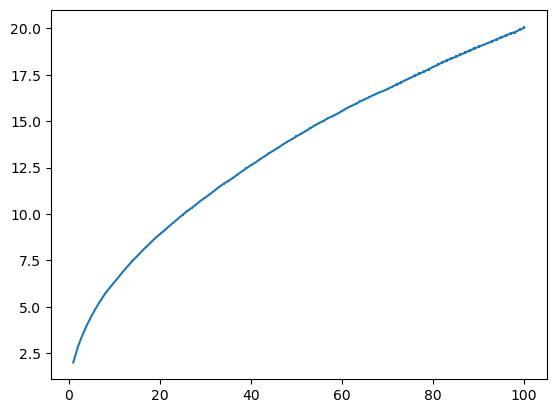

In [99]:
steps = np.arange(1, len(discreteMeans)+1)
plt.errorbar(steps, discreteMeans, yerr=discreteErrors)

In [100]:
def f(N, lam): return lam*np.sqrt(N)

In [101]:
popt, pcov = scipy.optimize.curve_fit(f, steps, discreteMeans)

In [102]:
popt, pcov

(array([2.00202245]), array([[2.73319475e-07]]))

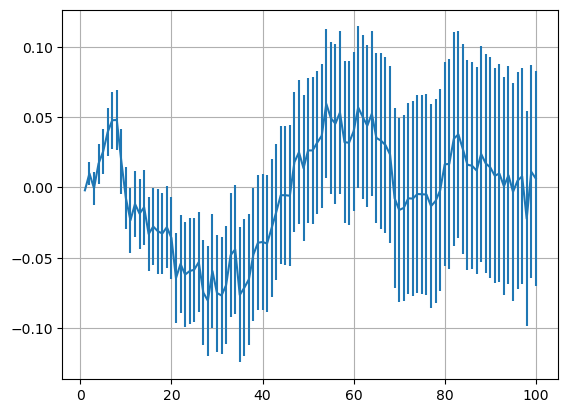

In [103]:
fitted_positions = f(steps, *popt)
plt.errorbar(steps, discreteMeans-fitted_positions, yerr=discreteErrors)
plt.grid()

In [104]:
popt

array([2.00202245])

In [105]:
np.sqrt(pcov)

array([[0.0005228]])

In [106]:
continuousMeans, continuousErrors = np.loadtxt("continuousRW.dat", unpack=True)

<ErrorbarContainer object of 3 artists>

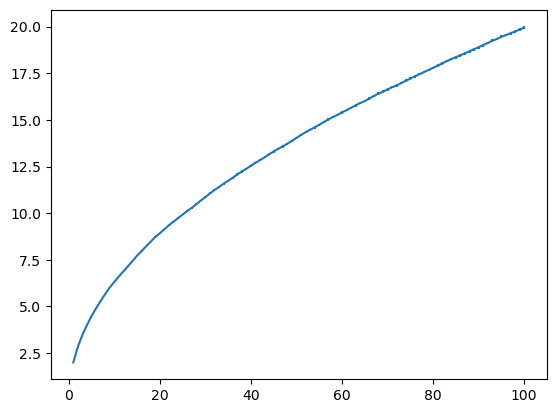

In [107]:
steps = np.arange(1, len(continuousMeans)+1)
plt.errorbar(steps,continuousMeans, yerr=continuousErrors)

In [108]:
def f(N, lam): return lam*np.sqrt(N)

In [109]:
popt, pcov = scipy.optimize.curve_fit(f, steps, continuousMeans)

In [110]:
popt, pcov

(array([1.98883838]), array([[1.79306002e-07]]))

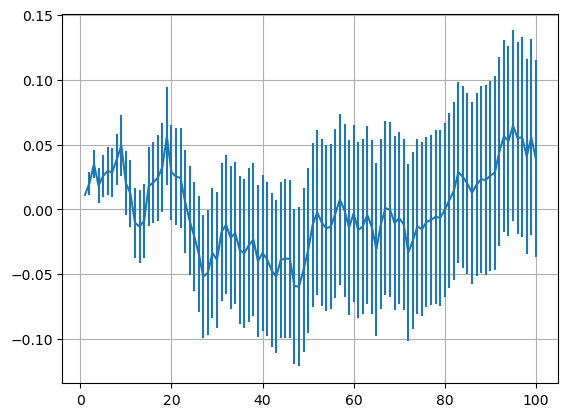

In [111]:
fitted_positions = f(steps, *popt)
plt.errorbar(steps,continuousMeans-fitted_positions, yerr=continuousErrors)
plt.grid()